In [404]:
url = 'https://www.kaggle.com/sherinclaudia/sarcastic-comments-on-reddit'

### Boston Marathon Challenge  
#### Specifically, use the tools at hand to determine which clustering solution, including number of clusters and algorithm used, is best for the marathon data. Once you have a solution you like, write a data story, including visualizations, where you teach the reader something about the Boston Marathon based on your clusters. Write up your report, including your process from start to finish, in a Jupyter notebook and submit it below..  

### Questions that need answering:

 1. What question are you trying to solve (or prove wrong) ?   
 __Clustering for the Boston Marathon 2013 dataset.__
 1. What kind of data do you have? -> describe the source.. 
 __Race results data, de-identified data from the race including:
     1. Age
     1. Gender
     1. Race times at intervals by 5k:  5k, 10k, 15k, 20k, half, 25k, 30k, 35k, 40k, and overall(finishing time).
     1. Division place
     1. Overall finishing place__
 1. Do some EDA, plots
 1. What's missing from the data and how do you deal with it?  
 __Nothing is really missing from the dataset.__
 1. How can you add, change, or remove features to get more out of your data?  
 __I added a new feature, called sustainer.  A sustainer is a runner that maintains their xk mile pace standard deviation at or below 0.02.  Basically at whatever speed they run, if they can be in the top 2% lowest standard deviation of runners, then they are a sustainer.__

### Test Report

#### Feature Engineering
I created a new feature called sustainer.  I took all of the run times for each runner, and computed the averge "k" pacing, and toold the standard deviation.  For this new feature sustainer, I set it to 1 if the runner maintained a "race" standard deviation less than or equal to the value, 0.02.  So if they ran at whatever speed they did, and maintained a consistent pace with the standard deviation within these parameters, they became a sustainer.  This sustainer feature became my label, against which I performed all predictions.

#### Elbow methods
In addition to the four methods described above, I ran the elbow method to determine the optimal number of clusters.  I discovered that optimal number of clusters was 3.

#### For this test, I these different clustering methods:
1. KMeans
1. Affinity Propagation
1. Means Shift
1. Spectral Analysis



*KMeans*  
Running with 3 clusters and KMeans did not yield any clear groupings that resembled the exercise from the lesson.  I found that the plot yielded a large sliver on the left of one cluster, interspersed with some other clusters.  What this did show was a concentration of data points, which was good.

*Affinity Propagation*. 
This model resulted in the prediction of 7,625 clusters.  This dataset is definitely not suitable for clustering with this model.  This was not a possible model to consider.

*Means Shift*  
Using the Means Shift model, with 3 clusters, displayed a smattering of clusters, without any real separation.  This too was not successful.  This too showed a similar concentration of data points as did KMeans.

*Spectral Analysis*
This model showed the most highly dense distribution of data points for cluster number 3.  Unfortunately, like the other models, excluding Affinity Propagation, it displayed 2 slivers; one large one on the left, and a faint other one to the right.

#### Key Learning. 
Not all models will have a clean separation between clusters, and may fail at any meaningful prediction, or classification.
This model fell into this condition.  Perhaps more feature engineering could produce a better more visible separation between clusters.

In [405]:
# Constants
max_iterations         = 10            # set it to > 0 for determining the features inportance
random_state           = 57
rows_in_training_set   = 10000
rows_in_test_set       = 200000
test_size              = 0.10
train_size             = 0.90
rfc_test_size          = 50000
rfc_train_size         = 5000
sample_size            = 10
run_CountVectorizer    = False
run_TfidfVectorizer    = True
BegTimeStampNewlines   = 3
EndTimeStampNewlines   = 3
EndTimeStamp           = '\n'*EndTimeStampNewlines+'End'
BegTimeStamp           = 'End'+'\n'*BegTimeStampNewlines
SustainerSTDDEVLimit   = 0.020

num_clusters = 3
target_column = 'overall_scaled'
xcolumnname = 'racestd'

In [406]:
# Controls
flag_to_run_rf = False
flag_to_plot_them = False
flag_to_run_correlation_matrix = False
flag_to_run_features_importance = False
flag_to_run_gradient_boosting  = False
flag_to_run_linear_regression  = False
flag_to_run_logistic_regression = False
flag_to_run_lasso_regression = False
flag_to_run_ridge_regression = False
flag_to_run_svc = False
flag_to_run_vectorizer_nb = False
flag_to_run_sentiment_analyzer = False
flag_to_run_affinity_propagation = True
flag_to_run_kmeans = True
flag_to_run_mean_shift = True
flag_to_run_spectral_clustering = True
flag_to_run_elbow_plot = True

debug = False

In [407]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt

%matplotlib inline

import chardet
import datetime
from sklearn import datasets, ensemble, metrics, linear_model
from sklearn.utils import shuffle
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
import time, sys
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.svm import SVC
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler, normalize
from IPython.display import Markdown, display
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import pairwise_distances, mean_squared_error
from sklearn.cluster import AffinityPropagation, KMeans, MeanShift, estimate_bandwidth, SpectralClustering
from scipy.spatial.distance import cdist

In [408]:
# add this to a dictionary
# Constants
max_iterations         = 10            # set it to > 0 for determining the features inportance
random_state           = 57
test_size              = 0.10
train_size             = 0.90

begin_string = '\n'*3+'Begin'
end_string = 'End'+'\n'*3

# Regression/Classification control
Regression = False 

print("Regression = {}".format(Regression))

Regression = False


In [409]:
# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_row', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [410]:
def plot_time_to_complete():
    objects = ('BernoulliNB', 'MultinomialNB', 'Logistic Regression')
    y_pos = np.arange(len(objects))
    performance = [18,17,32]

    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('Time in Minutes')
    plt.title('Yelp Sentiment Analysis Time to Complete')

    plt.show()

In [411]:
def file_stuff():
    
#     global df
    path = "../../../../"
    filename = "Datafiles/bostonmarathon/results/2013/results.csv"
    print("fullfilename = {}".format(path+filename))
    df = pd.read_csv(path+filename)
    print("There are {} rows in this file.".format(df.shape[0]))
    return df

In [412]:
def dataset_cleanup(df):
    # data Cleanup
    
#     global X, y
  
    df['gender_int'] = np.where(df['gender'] == 'M', 1, 0).astype(float)
    df['bib_int'] = df['bib'].replace(to_replace=r'[W|F]', value='-', regex=True).astype(int)
    kcolumns = ['5k', '10k', '20k', '25k', '30k', '35k', '40k', 'half']
    for kcol in kcolumns:
        df[kcol] = np.where(df[kcol] == '-', 0, df[kcol])
        df[kcol] = df[kcol].astype(float)
    df['5kpace']   = df['5k']/5.0
    df['10kpace']  = df['10k']/10.0
    df['20kpace']  = df['20k']/20.0
    df['halfpace'] = df['half']/21.095
    df['25kpace']  = df['25k']/25.0
    df['30kpace']  = df['30k']/30.0
    df['35kpace']  = df['35k']/35.0
    df['40kpace']  = df['40k']/40.0
    df['officialpace'] = df['official']/42.19
    # df['raceavg'] = ,axis=0).mean()
    df['racestd'] = df[['5kpace','10kpace','20kpace','halfpace','25kpace','30kpace','35kpace','40kpace','officialpace']].std(axis=1)
    df['raceavg'] = df[['5kpace','10kpace','20kpace','halfpace','25kpace','30kpace','35kpace','40kpace','officialpace']].mean(axis=1)
#     X = df[['age', 'gender_int','genderdiv', 'country', 'official','racestd','raceavg']]
#     X = pd.get_dummies(X)

    df.drop('ctz', axis=1, inplace=True)
    df.drop('state',axis=1, inplace=True)
    # these are the 2% sustainers.  They can be running at any pace, but they are consistent!
    df['sustainer'] = np.where(df['racestd'] <= SustainerSTDDEVLimit, 1, 0).astype(float) # they sustained their pace very well for the race
    scaler = MinMaxScaler()
    
    scaler.fit(df[['age']])
    df['age_scaled'] = scaler.transform(df[['age']]).astype(float)
    
    scaler.fit(df[['overall']])
    df['overall_scaled'] = scaler.transform(df[['overall']]).astype(float)
    
    scaler.fit(df[['pace']])
    df['pace_scaled'] = scaler.transform(df[['pace']])
    
    scaler.fit(df[['official']])
    df['official_scaled'] = scaler.transform(df[['official']]).astype(float)
    
    display('columns are now', df.columns)
#     df = fcn_MinMaxScaler(df, 'age', 'age_scaled')
#     df = fcn_MinMaxScaler(df, 'official', 'official_scaled')
    X = df[['age_scaled', 'sustainer', 'gender_int', 'racestd']]
#     X = pd.get_dummies(X)
   
    
    display("df columns cpt 92310: ", df.columns)
    
    global target_column, xcolumnname, ycolumnname
    
#     target_column = 'overall_scaled'
#     xcolumnname = 'age_scaled'
    ycolumnname = target_column
    
    y = df[target_column]
    printFormatted("target, y column is {}".format(target_column))

    if debug == True:
        print_timestamp("X and y variables created")
        
    printFormatted('we have cleaned up the dataframe.')
    display_column_names('df values', df)
    display_column_names('X values', X)
    return df, X, y

In [413]:
def printFormatted(string):
    newline = '\n'
    display(Markdown(string))
    write_to_logfile(string+newline)

In [414]:
def fcn_MinMaxScaler(dataframe, orig_column, new_column):
    display("cp 1: In fcn_MinMaxScaler.  shape is:", dataframe.shape)
    scaler = MinMaxScaler()
    scaler.fit(dataframe[['{}'.format(orig_column)]])
    dataframe[['{}'.format(new_column)]] = scaler.transform(dataframe['{}'.format(orig_column)])
    display("cp 2: In fcn_MinMaxScaler.  shape is:", dataframe.shape)
    
    return dataframe

In [415]:
def plot_facet():
    g = sns.FacetGrid(data=df, col='stars')
    g.map(plt.hist, 'message_length', bins=50)

In [416]:
def write_to_logfile(message, mdformat=''):
    bufsize = 0
    with open('TestResults.md', 'a+') as the_file:
        the_file.write('{} {}'.format(mdformat, message))

In [417]:
def plot_model_accuracy():
    objects = ('BernoulliNB', 'MultinomialNB', 'Logistic Regression')
    y_pos = np.arange(len(objects))
    performance = [75.81,85.98,91.08]

    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('Accuracy Percent')
    plt.title('Yelp Sentiment Analysis Accuracy')

    plt.show()

In [418]:
def print_timestamp(displaytext):    
    import sys
    import datetime
    datetime_now = str(datetime.datetime.now())
    printFormatted("{:19.19}: In: {} {} ".format(datetime_now, sys._getframe(1).f_code.co_name, displaytext))

In [419]:
def return_current_datetime():
    datetime_now = str(datetime.datetime.now())
    return datetime_now

In [420]:
# def printFormatted(string):
#     display(Markdown(string))

In [421]:
def data_demographics(dataframe, num_rows):

    display("dataframe.isnull().sum()", dataframe.isnull().sum())

    display("dataframe.columns\n", dataframe.columns)
    display("dataframe.head({})\n".format(num_rows), dataframe.head(num_rows))

    display("dataframe.sample({})\n".format(num_rows), dataframe.sample(num_rows))
    display("dataframe.dtypes\n", dataframe.dtypes)
    display("dataframe.describe()\n", dataframe.describe())

In [422]:
def plot_them():
    for column in X_train.columns:
#         plt.hist(X_train[column]*100, bins=40)
        plt.scatter(y_train, X_train[column]*100)
        plt.xlabel(column)
        plt.show()

In [423]:
def rfc_and_feature_importances(rf):    # Here we are using Random Forest classifier method to determine the top 30 features.

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, train_size=train_size)
    
    ## Fit the model on your training data.
    rf.fit(X_train, y_train) 
    
    ## And score it on your testing data.
    rf.score(X_test, y_test)

    feature_importance = rf.feature_importances_

    # Make importances relative to max importance.
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    cols=X.columns[sorted_idx].tolist() 
    cols=cols[::-1]
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.subplot(1, 2, 2)
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, X.columns[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')
    plt.show()
#     print("We are returning these columns {}".format(cols))
    return cols[:30] # return it sorted

In [424]:
def run_features_importance(rf,n):
# Here we will return the feature importances
    all_feature_important_columns = []
 
    for i in range(1,n):
        print_timestamp('running rfc iteration {} features importance for {} times'.format(i,n))
        columns2 = rfc_and_feature_importances(rf)
#         columns2.extend('{}'.format(i))
        all_feature_important_columns = all_feature_important_columns + columns2
    #     print("all_feature_import_columns={}".format(all_feature_important_columns))

    print("\nBOD:\nall_feature_important_columns = {}\nEOD".format(sorted(all_feature_important_columns)))
    for feature in set(all_feature_important_columns):
        print_timestamp("the NOC of feature {} in all_feature_important_columns is {}".format(feature, all_feature_important_columns.count(feature)))

In [425]:
def run_correlation_matrix():
    
    print_timestamp('Begin'+'\n'*3)
    
    # Setup the correlation matrix.
    corrmat = X.corr()
    print(corrmat)

    # Set up the subplots
    f, ax = plt.subplots(figsize=(12, 9))

    # Let's draw the heatmap using seaborn.
    sns.heatmap(corrmat, vmax=.6, square=True)
    plt.show()
    
    print_timestamp('\n'*3+'End')

In [426]:
def data_characteristics():
    
    printFormatted("#### Columns used in the dataset")
    display(df.columns)

    print("\n\n")
    printFormatted("#### Describe of the df dataset")
    display(df.describe())

    print("\n\n")
    printFormatted("#### Sample of 10 from the dataset")
    display(df.sample(sample_size))

    print("\n\n")
    printFormatted("#### Number of nulls in X")
    display(X.isnull().sum())
    print("\n\n\n")

In [427]:
def training_test_set(X, y):
#     global X_train, X_test, y_train, y_test
    # Let's fit it with the RFC training set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, train_size=train_size, random_state=0)
    print("train_size = {}, X_train is {}, and y_train is {}".format(train_size, len(X_train), len(y_train)))
    print("test_size  = {}, X_test  is {}, and y_test is {}".format(test_size, len(X_test), len(y_test)))
    
    return X_train, X_test, y_train, y_test

In [428]:
def run_rf(rf):
    print_timestamp('Begin run_rf part 1')
    
    ## Fit the model on your training data.
    rf.fit(X_train, y_train)   
    
    ## Let's score it with the training data set
    train_score = rf.score(X_train, y_train)
    print("Training score = {}".format(train_score))

    ## Let's score it with the test data set
    test_score = rf.score(X_test, y_test)
    
    print("Test score = {}".format(test_score))
    #Let's run cross validate score with the training data set
#     cross_val_score(rf, X_train, y_train, cv=5)
    
    print_timestamp('End run_rfr part 1')

In [429]:
def run_BernoulliNB(data, target):
    
    # Our data is binary / boolean, so we're importing the Bernoulli classifier.

    # Instantiate our model and store it in a new variable.
    bnb = BernoulliNB()

    # Fit our model to the data.
    bnb.fit(data, target)

    # Classify, storing the result in a new variable.
    y_pred = bnb.predict(data)

    # Display our results.
    print("Number of mislabeled points out of a total {} points : {}".format(
        data.shape[0],
        (target != y_pred).sum()
    ))
    
     ## Let's score it with the test data set
    test_score = bnb.score(data, target)
    
    print("Test score = {}".format(test_score))

In [430]:
def sentiment_analyzer(path, parameters, classifier, tfidf_parms):
    # path A = the old path
    # path B = the new path, no CountVectorizer at all
    
    
# run block of code and catch warnings
  
    if debug == True:
        print_timestamp(BegTimeStamp+" running with path={}".format(path))
    
    global vectorized
    vectorized = True
    
    pipeline_array = []
   
    if path == "A":
        if classifier == 'bnb':
            pipeline_array.append(Pipeline([
                ('tfidf', TfidfVectorizer(**tfidf_parms)),
                ('clf',   BernoulliNB(**parameters))
            ]))
        elif classifier == 'svc':
            pipeline_array.append(Pipeline([
                ('tfidf', TfidfVectorizer(**tfidf_parms)),
                ('clf',   SVC(kernel = 'linear', **parameters))
            ])) 
        elif classifier == 'mlb':
            pipeline_array.append(Pipeline([
                ('tfidf', TfidfVectorizer(**tfidf_parms)),
                ('clf',   MultinomialNB(**parameters))
            ]))
        elif classifier == 'logit':
            pipeline_array.append(Pipeline([
                ('tfidf', TfidfVectorizer(**tfidf_parms)),
                ('clf',   LogisticRegression(**parameters))
            ]))
        elif classifier == 'rfc':
            pipeline_array.append(Pipeline([
                ('tfidf', TfidfVectorizer(**tfidf_parms)),
                ('clf',   ensemble.RandomForestClassifier(**parameters))
            ]))  
            
    elif path == "B":
        if classifier == 'bnb':
            pipeline_array.append(Pipeline([
                ('tfidf', TfidfVectorizer(**tfidf_parms)),
                ('clf',   BernoulliNB(**parameters))
            ]))
        elif classifier == 'svc':
            pipeline_array.append(Pipeline([
                ('tfidf', TfidfVectorizer(**tfidf_parms)),
                ('clf',   SVC(kernel = 'linear', **parameters))
            ])) 
        elif classifier == 'mlb':
            pipeline_array.append(Pipeline([
                ('tfidf', TfidfVectorizer(**tfidf_parms)),
                ('clf',   MultinomialNB(**parameters))
            ]))
        elif classifier == 'logit':
            pipeline_array.append(Pipeline([
                ('tfidf', TfidfVectorizer()),
                ('clf',   LogisticRegression(**parameters))
            ]))
        elif classifier == 'rfc':
            pipeline_array.append(Pipeline([
                ('tfidf', TfidfVectorizer(**tfidf_parms)),
                ('clf',   ensemble.RandomForestClassifier(**parameters))
            ]))

    pipe = pipeline_array[0]
    
    try:
        vect_name_list = str(pipe.named_steps['vect']).split('(')
        vect_name = "vect = {}, ".format(vect_name_list[0])
    except:
        vect_name = ''

    classifier_name_list=str(pipe.named_steps['clf']).split('(')
    classifier_name=classifier_name_list[0]
    tfidf_name_list = str(pipe.named_steps['tfidf']).split('(')
    if len(tfidf_name_list) > 0:
        tfidf_name = tfidf_name_list[0]
    else:
        tfidf_name = ''

    printFormatted("####  Now running with: {} tfidf={} and clf={} {}\nparameters={} \n\n tfidf_parms={}".format( vect_name,
                                                                                                tfidf_name,
                                                                                                classifier_name,
                                                                                                return_current_datetime(),
                                                                                                parameters,
                                                                                                tfidf_parms
                                                                                                ))
    pipe.fit(X_train, y_train)

    y_pred_class  = pipe.predict(X_test)
    y_pred_class2 = pipe.predict(X_train)

    metrics_test_score =  metrics.accuracy_score(y_test, y_pred_class)
    metrics_train_score = metrics.accuracy_score(y_train, y_pred_class2)

    printFormatted('###  Metrics test accuracy score = {:.2%} with {}'.format(metrics_test_score, classifier_name))
    printFormatted('###  Metrics train accuracy score = {:.2%} with {}'.format(metrics_train_score, classifier_name))
    
    if debug == True:
        printFormatted("Steps information: {}".format(pipe.steps))
        print_timestamp("Finished running pipeline with:\n{}: ".format(classifier_name))
            
    return y_test, y_pred_class

    print_timestamp(EndTimeStamp)

Let's try predicting with gradient boosting classification

In [431]:
def run_gradient_boosting():

    print_timestamp('Begin')
    
    clf = ensemble.GradientBoostingClassifier(**params)

    #Let's run cross validate score with the training data set
    cross_val_score(clf, X_train, y_train, cv=5)

    loss_function = 'deviance' # could be exponential
    depth_value = 8
    params = {'n_estimators': 500,
              'max_depth': 8,
              'loss_function': loss_function,
              'max_leaf_nodes': depth_value, # 8 worked best...
              'min_samples_leaf': depth_value * 3
              ,'random_state' : random_state
             }

    clf.fit(X_train, y_train)

    predict_train = clf.predict(X_train)
    predict_test = clf.predict(X_test)
    
    print_timestamp('End')

In [432]:
def run_svc():

    print_timestamp('\n'*3+'Begin run_svc')
    
    # Let's do a linear Support Vector Classifier
    print_timestamp('Running SVC(kernel=linear')
    svm = SVC(kernel = 'linear')
    
    # Let's fit the training model
    print_timestamp('Running svm.fit')
    svm.fit(X_train, y_train)
    
    # Let's score the training set
    print_timestamp('Running svm.score for the training set')
    svm.score(X_train, y_train)
    
    # Let's score the test set
    print_timestamp('Running svm.fit for the test set')
    svm.score(X_test, y_test)

    print_timestamp('\n'*3+'End run_svc')

In [433]:
def run_logistic_regression():
    print_timestamp('\n'*3+'Begin')

    lr = LogisticRegression(C=1e20, solver='lbfgs', max_iter=1000)

    print_timestamp('Running lr.fit for the training set')
    lr.fit(X_train, y_train)
    
    print_timestamp('Running lr.fit for the training set')
    print('\nR-squared simple model training set yields:')
    print(lr.score(X_train, y_train))
    print("here comes the test set")
    lrscore = lr.score(X_test, y_test)
    printFormatted("###  Logistic Regression score={:.2%}".format(lrscore))
    
    print_timestamp('\n'*3+'End')

In [434]:
def run_linear_regression():

    print_timestamp('\n'*3+'Begin')

    regr = linear_model.LinearRegression()

    print_timestamp('Running regr.fit for the training set')
    regr.fit(X_train, y_train)
    
    print("\nCoeffecients: \n", regr.coef_)
    print("\nIntercept: \n", regr.intercept_)
    print("\nR-squared for training data set:")
    print(regr.score(X_train, y_train))
    
    print("\nR-squared for test data set:")
    print(regr.score(X_test, y_test))
    
    print_timestamp('End run_linear_regression.\n\n')
    
    print_timestamp('\n'*3+'End')

In [435]:
def run_ridge_regression():
    # Fitting a ridge regression model. Alpha is the regularization
    # parameter (usually called lambda). As alpha gets larger, parameter
    # shrinkage grows more pronounced. Note that by convention, the
    # intercept is not regularized. Since we standardized the data
    # earlier, the intercept should be equal to zero and can be dropped.
    print_timestamp('\n'*3+'Begin')
    
    ridgeregr = linear_model.Ridge(alpha=10, fit_intercept=False) 
    ridgeregr.fit(X_train, y_train)
    print(ridgeregr.score(X_train, y_train))

    print_timestamp('\n'*3+'End')

In [436]:
def run_affinity_propagation(data, target):
      
    print_timestamp('\n'*3+'starting AffinityPropagation')

    print_timestamp('\n'*3+'Begin')
    
    ap = AffinityPropagation()
#     ap = AffinityPropagation(damping=0.5,
#                          max_iter=200,
#                          convergence_iter=15,
#                          copy=True,
#                          preference=None,
#                          affinity='euclidean',
#                          verbose=False) 

    model = ap.fit(data)
    pred = ap.predict(data)

    Z = merge_predict_and_cluster(data, target, pred) # let's merge the data dataframe, prediction, and the cluster
    
    # Pull the number of clusters and cluster assignments for each data point.
    cluster_centers_indices = ap.cluster_centers_indices_
    n_clusters_ = len(cluster_centers_indices)
    labels = ap.labels_
    
    print('Estimated number of clusters: {}'.format(n_clusters_))

    labels = model.labels_
    
    print("from run_affinity_propagation {}".format(metrics.silhouette_score(data, labels, metric='euclidean')))
    
    print_timestamp('\n'*3+'finished with AffinityPropagation')
    
    return Z, n_clusters_

In [437]:
def run_kmeans(data, target, K):

    print_timestamp('\n'*3+'Begin')
    print("running with number of clusters = {}".format(K))
    km = KMeans(n_clusters=K, random_state=42)

#     pred = KMeans(n_clusters=K, random_state=42).fit_predict(data)
    pred = km.fit_predict(data)
#     Z = pd.DataFrame()
    Z = merge_predict_and_cluster(data, target, pred) # let's merge the data dataframe, prediction, and the cluster
#     Z = pd.merge(data, pd.DataFrame(pred), left_index=True, right_index=True)
#     display_column_names('first Z values', Z)
#     Z.rename(columns={Z.columns[-1]: 'cluster'}, inplace=True)
#     display_column_names('second Z values', Z)
#     Z = pd.merge(Z, target, left_index=True, right_index=True)
#     display_column_names('third Z values', Z)
#     print("z columns are {}".format(Z.columns))

    if debug == True:  
        print("the shape of Kmeans_pred is {}, and the shape of X is {}, and the shape of Z is {}".format(pred.shape,
                                                                                                      data.shape,
                                                                                                      Z.shape))
        display(Z.head(100))
        display_column_names('Z below values', Z)

        count = Z.groupby(['cluster']).count() 
        display("Z: Count by clusters are this:\n", count) 
  
    return Z
        
    print_timestamp('\n'*3+'End')

In [438]:
def merge_predict_and_cluster(dataframe, target, predict):
    Z = pd.merge(dataframe, target, left_index=True, right_index=True)
    Z = pd.merge(Z, pd.DataFrame(predict), left_index=True, right_index=True)
    Z.rename(columns={Z.columns[-1]: 'cluster'}, inplace=True)
    
    return Z

In [439]:
def run_spectral_clustering(data, target, K):
    display_dataframe_shape('entering run_spectral_clustering, data has shape of:', data)
    display_dataframe_shape('entering run_spectral_clustering, target has shape of:', target)
    print_timestamp('\n'*3+'Begin')
    
#     for clusternum in range(2, K):
    print_timestamp("Running spectral_clustering with {} clusters.".format(K))
    n_clusters=K

    # Declare and fit the model.
    sc = SpectralClustering(n_clusters=K)
    sc.fit(data)

    #Predicted clusters.
    predict=sc.fit_predict(data)

    Z = merge_predict_and_cluster(data, target, predict) # let's merge the data dataframe, prediction, and the cluster

    if debug == True:
        display_dataframe_shape('in run_spectral_clustering, Z has shape of:', Z)
        display_dataframe_shape('in run_spectral_clustering, target has shape of:', target)
        display("the datatypes of Z are", Z.dtypes)

#     plt.scatter(Z['cluster'], Z[target_column], c=Z['cluster'])
#     plt.show()

    labels = sc.labels_
    print("from spectral clustering {}".format(metrics.silhouette_score(data, labels, metric='euclidean')))

#     print('Comparing the assigned categories to the ones in the data:')
#     print(pd.crosstab(target,predict))
    
    print_timestamp('\n'*3+'End')
    
    return Z

In [440]:
def do_the_elbow(X):
    printFormatted("## We are plotting the elbow method!")
    # calculate distortion for a range of number of cluster
    distortions = []
    for i in range(1, 11):
        km = KMeans(
            n_clusters=i, init='random',
            n_init=10, max_iter=300,
            tol=1e-04, random_state=0
        )
        km.fit(X)
        distortions.append(km.inertia_)

    # plot
    plt.plot(range(1, 11), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()

In [441]:
def plot_it_clusters(dataframe, xvalue, yvalue, title):
    
    if debug == True:
        display_dataframe_shape('entry received in plot_it_clusters', dataframe)
        display(dataframe.dtypes)

    data_demographics(dataframe, 10)
        
    plt.rcParams['figure.figsize'] = [xvalue, yvalue]
    plt.xlabel(xcolumnname)
    plt.ylabel(ycolumnname)
    
    df0 = dataframe[dataframe.cluster == 0]
    df1 = dataframe[dataframe.cluster == 1]
    df2 = dataframe[dataframe.cluster == 2]
    df3 = dataframe[dataframe.cluster == 3]
    df4 = dataframe[dataframe.cluster == 4]
    df5 = dataframe[dataframe.cluster == 5]
    
    plt.scatter(df0[xcolumnname], df0[ycolumnname], color='green')
    plt.scatter(df1[xcolumnname], df1[ycolumnname], color='red')
    plt.scatter(df2[xcolumnname], df2[ycolumnname], color='blue')
    plt.scatter(df3[xcolumnname], df3[ycolumnname], color='black')
    plt.scatter(df4[xcolumnname], df4[ycolumnname], color='magenta')
    plt.scatter(df5[xcolumnname], df5[ycolumnname], color='orange')
    plt.title(title)
    plt.show()
        
#     plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
    
#     if type == 'KMeans':
#         plt.xlabel('Age')
#         plt.ylabel('Income ($)')
#         plt.legend()
#         plt.scatter(km.cluster_centers[:,0], 
#                     km.cluster_centers[:,1],
#                     marker = '*',
#                     label = 'centroid')

In [442]:
def run_mean_shift(data, target):
    
    print_timestamp('\n'*3+'Begin')  

    X_train = data
    
    # Here we set the bandwidth. This function automatically derives a bandwidth
    # number based on an inspection of the distances among points in the data.
    bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

    # Declare and fit the model.
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    if debug == True:
        display_dataframe_shape('this is the shape of data coming into run_mean_shift', data)
    ms.fit(data)

    if debug == True:
        display_dataframe_shape('this is the shape of target coming into run_mean_shift', target)
    pred = ms.predict(data)
    if debug == True:
        display_dataframe_shape('this is the shape of pred after predict in run_mean_shift', data)
        
    Z = merge_predict_and_cluster(data, target, pred) # let's merge the data dataframe, prediction, and the cluster

    # Extract cluster assignments for each data point.
    labels = ms.labels_

    print("from mean shift {}".format(metrics.silhouette_score(data, labels, metric='euclidean')))
    
    # Coordinates of the cluster centers.
    cluster_centers = ms.cluster_centers_

    # Count our clusters.
    n_clusters_ = len(np.unique(labels))

    print("Number of estimated clusters: {}".format(n_clusters_))
    
    print_timestamp('\n'*3+'End')
    
    return Z, n_clusters_

In [443]:
def vectorizer_nb(type_of_vectorizer):

    print_timestamp(BegTimeStamp)
    
    # 1. import and instantiate CountVectorizer (with the default parameters)

    # 2. instantiate CountVectorizer (vectorizer)

#     X = df.message
#     y = df.sentiment_label

    # split X and y into training and testing sets
    # by default, it splits 75% training and 25% test
    # random_state=1 for reproducibility
    
#     X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    # 3. fit & transform
    if type_of_vectorizer == 'Count':
        print("We are running with CountVectorizer")
        vectorizer = CountVectorizer()
        vectorizer.fit(X_train)
        vectorizer_method = 'CountVectorizer'
    elif type_of_vectorizer == 'Tfidf':
        print("We are running with TfidfVectorizer")
        vectorizer = TfidfVectorizer()
        vectorizer.fit_transform(X_train)
        vectorizer_method = 'TfidfVectorizer'
    
    # 4. transform training data
    X_train_dtm = vectorizer.transform(X_train)

    # equivalently: combine fit and transform into a single step
    # this is faster and what most people would do
    X_train_dtm = vectorizer.fit_transform(X_train)

    # 4. transform testing data (using fitted vocabulary) into a document-term matrix
    X_test_dtm = vectorizer.transform(X_test)

    # 1. import

    # 2. instantiate a Multinomial Naive Bayes model
    nb = MultinomialNB()

    # 3. train the model 
    # using X_train_dtm (timing it with an IPython "magic command")

    nb.fit(X_train_dtm, y_train)
    
    
    # 4. make class predictions for X_test_dtm
    y_pred_class = nb.predict(X_test_dtm)

    # calculate accuracy of class predictions

    met_test_score = metrics.accuracy_score(y_test, y_pred_class)
    printFormatted('###  With {} vectorizer, the metrics accuracy score = {:.2%}'.format(vectorizer_method,
                                                                                         met_test_score))
    
    print_timestamp(EndTimeStamp)

In [444]:
def display_column_names(label, df):
    display("Label: {}: Column names are:".format(label), df.columns)

In [445]:
def display_dataframe_shape(label, df):
    display("Label: {}: Dataframe shape is:".format(label), df.shape)

In [446]:
def run_it(X_train, X_test, y_train, y_test, y):
    
#     file_stuff()
    
#     data_cleanup()
    
    print_timestamp('\n'*3+'Begin')
    
    if Regression == True:
        print_timestamp("We are running with a Regression model")
    elif Regression == False:
        print_timestamp("We are running with a Classifier model")
    else:
        print_timestamp("We have failed to set the Regression variable")
        sys.exit(main())
        

    if flag_to_plot_them == True:
        plot_them()

    if flag_to_run_features_importance == True:
        
        number_of_features_to_consider = 50
        params = {'n_estimators': 100}

        if Regression == True:
            print_timestamp('We are running RandomForestRegressor')
            rf = ensemble.RandomForestRegressor(**params)
            
        else:
            print_timestamp('We are running RandomForestClassifier')
            rf = ensemble.RandomForestClassifier(**params)

        run_features_importance(rf, number_of_features_to_consider)

    if flag_to_run_correlation_matrix == True:
        run_correlation_matrix()

    if flag_to_run_rf == True:
        #     params = {}
        params = {'n_estimators': 100} 

        if Regression == True:
            rf = ensemble.RandomForestRegressor(**params)
            print_timestamp('We are running RandomForestRegressor')
        else:
            rf = ensemble.RandomForestClassifier(**params)
            print_timestamp('We are running RandomForestClassifier')

        run_rf(rf)

    if flag_to_run_gradient_boosting  == True:
        run_gradient_boosting()

    if flag_to_run_linear_regression  == True:
        run_linear_regression()

    if flag_to_run_logistic_regression == True:
        run_logistic_regression()

    if flag_to_run_svc == True:
        run_svc() 

    if flag_to_run_ridge_regression == True:
        run_ridge_regression()
        
    if flag_to_run_vectorizer_nb == True:
        for vectorizer_iterator in ['Count', 'Tfidf']:
            vectorizer_nb(vectorizer_iterator)
        
    if flag_to_run_kmeans == True:
        method = KMeans(
             n_clusters=num_clusters
#                 ,random_state=42
#                 ,init='random'
#                 ,n_init=10
#                 ,max_iter=300
#                 ,tol=1e-04 
        )
        df1 = run_kmeans(X_train, y_train, num_clusters)
        plot_it_clusters(df1, xvalue=16, yvalue=16, title="KMeans with number of clusters = {}".format(num_clusters))
        display("next plot please")

    if flag_to_run_affinity_propagation == True:
        display_column_names('columns of X_train going into affinity_propagation: ', X_train)
        df2, ap_num_clusters = run_affinity_propagation(X_train, y_train)
        plot_it_clusters(df2, xvalue=16, yvalue=16, title="Affinity Propagation with number of clusters = {}".format(ap_num_clusters))
        
    if flag_to_run_mean_shift == True:
        df3, mean_shift_num_clusters = run_mean_shift(X_train, y_train)
        plot_it_clusters(df3, xvalue=16, yvalue=16, title="Mean Shift with number of clusters = {}".format(mean_shift_num_clusters))
    
    if flag_to_run_spectral_clustering == True:
        df4 = run_spectral_clustering(X_train, y_train, K=num_clusters)
        plot_it_clusters(df4, xvalue=16, yvalue=16,title="Spectral clustering with number of clusters = {}".format(num_clusters) )

    print_timestamp('End'+'\n'*3)

In [447]:
def main(entry_point):
        
    if entry_point == 0:
        print_timestamp("Starting main()")
        df = file_stuff()
        data_demographics(df, 5)
        display_column_names('post data_demographics of df', df)
        df, X, y = dataset_cleanup(df)
        display_column_names('post dataset_cleanup on X', X)
        data_demographics(df, 5)
        display_column_names('post data_demographics on X #2', X)
#         make_X_and_Y()
        X_train, X_test, y_train, y_test = training_test_set(X, y)
        display_column_names('after training_test_set: columns of X_train going into affinity_propagation: ', X_train)
#         data_characteristics()
#         plot_time_to_complete()
#         plot_model_accuracy()
#         plot_facet()

    if flag_to_run_elbow_plot == True:    do_the_elbow(X)
    run_it(X_train, X_test, y_train, y_test, y)
        
    print_timestamp("Ending main()")

2019-07-25 23:22:55: In: main Starting main() 

fullfilename = ../../../../Datafiles/bostonmarathon/results/2013/results.csv
There are 16164 rows in this file.


'dataframe.isnull().sum()'

25k              0
age              0
name             0
division         0
10k              0
gender           0
half             0
official         0
bib              0
ctz          15407
country          0
overall          0
pace             0
state         1463
30k              0
5k               0
genderdiv        0
20k              0
35k              0
city             1
40k              0
dtype: int64

'dataframe.columns\n'

Index(['25k', 'age', 'name', 'division', '10k', 'gender', 'half', 'official', 'bib', 'ctz', 'country', 'overall', 'pace', 'state', '30k', '5k', 'genderdiv', '20k', '35k', 'city', '40k'], dtype='object')

'dataframe.head(5)\n'

,25k,age,name,division,10k,gender,half,official,bib,ctz,country,overall,pace,state,30k,5k,genderdiv,20k,35k,city,40k
0,49.87,28,"Cassidy, Josh R.",9,18.18,M,40.93,90.900,W1,NaN,CAN,9,3.470,ON,62.07,8.90,9,38.80,74.73,Toronto,85.55
1,77.27,30,"Korir, Wesley",5,30.90,M,64.90,132.500,1,NaN,KEN,5,5.070,NaN,92.97,15.90,5,61.52,108.78,Kenya,124.77
2,77.23,23,"Desisa, Lelisa",1,30.90,M,64.92,130.370,2,NaN,ETH,1,4.980,NaN,92.72,15.93,1,61.53,108.68,Ambo,123.78
3,50.50,32,"Fearnley, Kurt H.",5,18.73,M,42.00,88.430,W2,NaN,AUS,5,3.380,NaN,61.35,8.98,5,39.88,73.00,Hamilton,83.43
4,48.75,39,"Hokinoue, Kota",3,18.18,M,40.57,87.220,W3,NaN,JPN,3,3.330,NaN,59.92,8.92,3,38.55,71.68,Iizuka,81.88


'dataframe.sample(5)\n'

,25k,age,name,division,10k,gender,half,official,bib,ctz,country,overall,pace,state,30k,5k,genderdiv,20k,35k,city,40k
7162,121.72,34,"Anderson, Rebecca J.",3348,47.58,F,101.25,235.550,8676,NaN,USA,15144,9.000,UT,149.20,23.70,5569,95.80,184.00,Eagle Mountain,220.95
133,85.67,27,"Madut, Thomas G.",53,33.60,M,71.92,149.000,150,NaN,USA,73,5.680,SD,103.77,16.63,66,68.15,122.17,Mitchell,140.53
5523,109.72,55,"Anderson, Nate",102,44.83,M,92.75,197.420,6697,NaN,USA,5230,7.530,CO,132.80,23.00,4571,88.03,157.52,Steamboat Springs,184.37
9782,122.00,38,"St. Clair, Suzanne W.",2051,47.75,F,102.27,216.170,11870,NaN,USA,10148,8.250,TX,148.20,23.75,2768,96.85,175.32,Fort Worth,203.63
7437,121.45,56,"Walls, Richard S.",557,47.68,M,102.15,223.350,9012,NaN,USA,12191,8.530,WY,150.15,23.93,8294,96.68,180.20,Jackson,210.58


'dataframe.dtypes\n'

25k           object
age            int64
name          object
division       int64
10k           object
gender        object
half          object
official     float64
bib           object
ctz           object
country       object
overall        int64
pace         float64
state         object
30k           object
5k            object
genderdiv      int64
20k           object
35k           object
city          object
40k           object
dtype: object

'dataframe.describe()\n'

,age,division,official,overall,pace,genderdiv
count,16164.000,16164.000,16164.000,16164.000,16164.000,16164.000
mean,41.638,1100.967,208.159,8429.373,7.947,4351.685
std,10.351,942.115,23.744,5052.024,0.906,2772.398
min,18.000,1.000,85.530,1.000,3.270,1.000
25%,34.000,363.000,191.727,4061.750,7.320,2032.750
50%,42.000,842.000,209.225,8247.500,7.980,4113.500
75%,49.000,1560.000,225.230,12662.250,8.600,6316.000
max,80.000,3834.000,284.230,17598.000,10.850,10648.000


'Label: post data_demographics of df: Column names are:'

Index(['25k', 'age', 'name', 'division', '10k', 'gender', 'half', 'official', 'bib', 'ctz', 'country', 'overall', 'pace', 'state', '30k', '5k', 'genderdiv', '20k', '35k', 'city', '40k'], dtype='object')

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


'columns are now'

Index(['25k', 'age', 'name', 'division', '10k', 'gender', 'half', 'official', 'bib', 'country', 'overall', 'pace', '30k', '5k', 'genderdiv', '20k', '35k', 'city', '40k', 'gender_int', 'bib_int', '5kpace', '10kpace', '20kpace', 'halfpace', '25kpace', '30kpace', '35kpace', '40kpace', 'officialpace', 'racestd', 'raceavg', 'sustainer', 'age_scaled', 'overall_scaled', 'pace_scaled', 'official_scaled'], dtype='object')

'df columns cpt 92310: '

Index(['25k', 'age', 'name', 'division', '10k', 'gender', 'half', 'official', 'bib', 'country', 'overall', 'pace', '30k', '5k', 'genderdiv', '20k', '35k', 'city', '40k', 'gender_int', 'bib_int', '5kpace', '10kpace', '20kpace', 'halfpace', '25kpace', '30kpace', '35kpace', '40kpace', 'officialpace', 'racestd', 'raceavg', 'sustainer', 'age_scaled', 'overall_scaled', 'pace_scaled', 'official_scaled'], dtype='object')

target, y column is overall_scaled

we have cleaned up the dataframe.

'Label: df values: Column names are:'

Index(['25k', 'age', 'name', 'division', '10k', 'gender', 'half', 'official', 'bib', 'country', 'overall', 'pace', '30k', '5k', 'genderdiv', '20k', '35k', 'city', '40k', 'gender_int', 'bib_int', '5kpace', '10kpace', '20kpace', 'halfpace', '25kpace', '30kpace', '35kpace', '40kpace', 'officialpace', 'racestd', 'raceavg', 'sustainer', 'age_scaled', 'overall_scaled', 'pace_scaled', 'official_scaled'], dtype='object')

'Label: X values: Column names are:'

Index(['age_scaled', 'sustainer', 'gender_int', 'racestd'], dtype='object')

'Label: post dataset_cleanup on X: Column names are:'

Index(['age_scaled', 'sustainer', 'gender_int', 'racestd'], dtype='object')

'dataframe.isnull().sum()'

25k                0
age                0
name               0
division           0
10k                0
gender             0
half               0
official           0
bib                0
country            0
overall            0
pace               0
30k                0
5k                 0
genderdiv          0
20k                0
35k                0
city               1
40k                0
gender_int         0
bib_int            0
5kpace             0
10kpace            0
20kpace            0
halfpace           0
25kpace            0
30kpace            0
35kpace            0
40kpace            0
officialpace       0
racestd            0
raceavg            0
sustainer          0
age_scaled         0
overall_scaled     0
pace_scaled        0
official_scaled    0
dtype: int64

'dataframe.columns\n'

Index(['25k', 'age', 'name', 'division', '10k', 'gender', 'half', 'official', 'bib', 'country', 'overall', 'pace', '30k', '5k', 'genderdiv', '20k', '35k', 'city', '40k', 'gender_int', 'bib_int', '5kpace', '10kpace', '20kpace', 'halfpace', '25kpace', '30kpace', '35kpace', '40kpace', 'officialpace', 'racestd', 'raceavg', 'sustainer', 'age_scaled', 'overall_scaled', 'pace_scaled', 'official_scaled'], dtype='object')

'dataframe.head(5)\n'

,25k,age,name,division,10k,gender,half,official,bib,country,overall,pace,30k,5k,genderdiv,20k,35k,city,40k,gender_int,bib_int,5kpace,10kpace,20kpace,halfpace,25kpace,30kpace,35kpace,40kpace,officialpace,racestd,raceavg,sustainer,age_scaled,overall_scaled,pace_scaled,official_scaled
0,49.870,28,"Cassidy, Josh R.",9,18.180,M,40.930,90.900,W1,CAN,9,3.470,62.070,8.900,9,38.800,74.730,Toronto,85.550,1.000,-1,1.780,1.818,1.940,1.940,1.995,2.069,2.135,2.139,2.155,0.139,1.997,0.000,0.161,0.000,0.026,0.027
1,77.270,30,"Korir, Wesley",5,30.900,M,64.900,132.500,1,KEN,5,5.070,92.970,15.900,5,61.520,108.780,Kenya,124.770,1.000,1,3.180,3.090,3.076,3.077,3.091,3.099,3.108,3.119,3.141,0.034,3.109,0.000,0.194,0.000,0.237,0.236
2,77.230,23,"Desisa, Lelisa",1,30.900,M,64.920,130.370,2,ETH,1,4.980,92.720,15.930,1,61.530,108.680,Ambo,123.780,1.000,2,3.186,3.090,3.077,3.078,3.089,3.091,3.105,3.095,3.090,0.033,3.100,0.000,0.081,0.000,0.226,0.226
3,50.500,32,"Fearnley, Kurt H.",5,18.730,M,42.000,88.430,W2,AUS,5,3.380,61.350,8.980,5,39.880,73.000,Hamilton,83.430,1.000,-2,1.796,1.873,1.994,1.991,2.020,2.045,2.086,2.086,2.096,0.103,1.998,0.000,0.226,0.000,0.015,0.015
4,48.750,39,"Hokinoue, Kota",3,18.180,M,40.570,87.220,W3,JPN,3,3.330,59.920,8.920,3,38.550,71.680,Iizuka,81.880,1.000,-3,1.784,1.818,1.927,1.923,1.950,1.997,2.048,2.047,2.067,0.101,1.951,0.000,0.339,0.000,0.008,0.009


'dataframe.sample(5)\n'

,25k,age,name,division,10k,gender,half,official,bib,country,overall,pace,30k,5k,genderdiv,20k,35k,city,40k,gender_int,bib_int,5kpace,10kpace,20kpace,halfpace,25kpace,30kpace,35kpace,40kpace,officialpace,racestd,raceavg,sustainer,age_scaled,overall_scaled,pace_scaled,official_scaled
15742,133.000,50,"Moses, Julie K.",401,51.700,F,111.280,239.480,19713,USA,15992,9.150,162.730,25.870,6036,105.450,194.580,Traverse City,226.130,0.000,19713,5.174,5.170,5.272,5.275,5.320,5.424,5.559,5.653,5.676,0.196,5.392,0.000,0.516,0.909,0.776,0.775
179,92.480,22,"O'Connell, Thomas P II",2343,35.930,M,76.880,192.580,205,USA,4235,7.350,115.050,17.950,3821,72.900,147.130,Wichita,179.430,1.000,205,3.590,3.593,3.645,3.644,3.699,3.835,4.204,4.486,4.565,0.394,3.918,0.000,0.065,0.241,0.538,0.539
11432,123.830,26,"Venturelli, Gina M.",2226,49.620,F,104.120,218.080,13919,USA,10694,8.330,150.370,25.050,3063,98.670,177.950,Fort Wayne,206.000,0.000,13919,5.010,4.962,4.934,4.936,4.953,5.012,5.084,5.150,5.169,0.091,5.023,0.000,0.129,0.608,0.668,0.667
16157,141.080,61,"Cortes, Dora",25,57.820,F,118.970,237.480,20834,USA,15564,9.070,169.500,29.350,5797,112.850,197.850,New York,225.570,0.000,20834,5.870,5.782,5.643,5.640,5.643,5.650,5.653,5.639,5.629,0.084,5.683,0.000,0.694,0.884,0.765,0.765
895,98.570,50,"Hrynowski, E. J.",12,39.350,M,83.220,167.870,1119,USA,645,6.420,118.630,19.780,610,78.930,138.870,Arlington,158.900,1.000,1119,3.956,3.935,3.947,3.945,3.943,3.954,3.968,3.973,3.979,0.015,3.955,1.000,0.516,0.037,0.416,0.414


'dataframe.dtypes\n'

25k                float64
age                  int64
name                object
division             int64
10k                float64
gender              object
half               float64
official           float64
bib                 object
country             object
overall              int64
pace               float64
30k                float64
5k                 float64
genderdiv            int64
20k                float64
35k                float64
city                object
40k                float64
gender_int         float64
bib_int              int64
5kpace             float64
10kpace            float64
20kpace            float64
halfpace           float64
25kpace            float64
30kpace            float64
35kpace            float64
40kpace            float64
officialpace       float64
racestd            float64
raceavg            float64
sustainer          float64
age_scaled         float64
overall_scaled     float64
pace_scaled        float64
official_scaled    float64
d

'dataframe.describe()\n'

,25k,age,division,10k,half,official,overall,pace,30k,5k,genderdiv,20k,35k,40k,gender_int,bib_int,5kpace,10kpace,20kpace,halfpace,25kpace,30kpace,35kpace,40kpace,officialpace,racestd,raceavg,sustainer,age_scaled,overall_scaled,pace_scaled,official_scaled
count,16164.000,16164.000,16164.000,16164.000,16164.000,16164.000,16164.000,16164.000,16164.000,16164.000,16164.000,16164.000,16164.000,16164.000,16164.000,16164.000,16164.000,16164.000,16164.000,16164.000,16164.000,16164.000,16164.000,16164.000,16164.000,16164.000,16164.000,16164.000,16164.000,16164.000,16164.000,16164.000
mean,118.036,41.638,1100.967,46.655,99.133,208.159,8429.373,7.947,143.425,23.329,4351.685,93.953,169.750,196.352,0.599,9875.481,4.666,4.666,4.698,4.699,4.721,4.781,4.850,4.909,4.934,0.124,4.769,0.053,0.381,0.479,0.617,0.617
std,13.423,10.351,942.115,5.254,10.965,23.744,5052.024,0.906,16.345,2.879,2772.398,10.410,19.928,23.230,0.490,5756.098,0.576,0.525,0.521,0.520,0.537,0.545,0.569,0.581,0.563,0.163,0.523,0.223,0.167,0.287,0.119,0.119
min,0.000,18.000,1.000,0.000,0.000,85.530,1.000,3.270,0.000,0.000,1.000,0.000,0.000,0.000,0.000,-119.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.027,0.003,0.457,0.000,0.000,0.000,0.000,0.000
25%,108.900,34.000,363.000,43.200,91.530,191.727,4061.750,7.320,132.170,21.700,2032.750,86.765,156.345,180.900,0.000,4899.750,4.340,4.320,4.338,4.339,4.356,4.406,4.467,4.522,4.544,0.047,4.402,0.000,0.258,0.231,0.534,0.534
50%,119.150,42.000,842.000,47.170,100.080,209.225,8247.500,7.980,144.700,23.630,4113.500,94.870,171.210,197.780,1.000,9786.500,4.726,4.717,4.744,4.744,4.766,4.823,4.892,4.944,4.959,0.086,4.816,0.000,0.387,0.469,0.621,0.623
75%,127.320,49.000,1560.000,50.280,106.850,225.230,12662.250,8.600,154.780,25.180,6316.000,101.270,183.570,212.600,1.000,14783.250,5.036,5.028,5.063,5.065,5.093,5.159,5.245,5.315,5.338,0.152,5.144,0.000,0.500,0.720,0.703,0.703
max,163.620,80.000,3834.000,66.680,138.670,284.230,17598.000,10.850,195.870,33.220,10648.000,131.720,229.500,268.400,1.000,20908.000,6.644,6.668,6.586,6.574,6.545,6.529,6.557,6.710,6.737,2.756,6.532,1.000,1.000,1.000,1.000,1.000


'Label: post data_demographics on X #2: Column names are:'

Index(['age_scaled', 'sustainer', 'gender_int', 'racestd'], dtype='object')

train_size = 0.9, X_train is 14547, and y_train is 14547
test_size  = 0.1, X_test  is 1617, and y_test is 1617


'Label: after training_test_set: columns of X_train going into affinity_propagation: : Column names are:'

Index(['age_scaled', 'sustainer', 'gender_int', 'racestd'], dtype='object')

## We are plotting the elbow method!

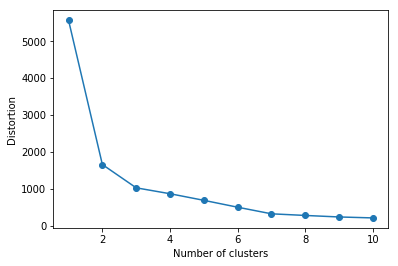

2019-07-25 23:22:57: In: run_it 


Begin 

2019-07-25 23:22:57: In: run_it We are running with a Classifier model 

2019-07-25 23:22:57: In: run_kmeans 


Begin 

running with number of clusters = 3


'dataframe.isnull().sum()'

age_scaled        0
sustainer         0
gender_int        0
racestd           0
overall_scaled    0
cluster           0
dtype: int64

'dataframe.columns\n'

Index(['age_scaled', 'sustainer', 'gender_int', 'racestd', 'overall_scaled', 'cluster'], dtype='object')

'dataframe.head(10)\n'

,age_scaled,sustainer,gender_int,racestd,overall_scaled,cluster
6260,0.565,0.000,1.000,0.129,0.458,1
10551,0.613,0.000,1.000,0.049,0.557,0
2327,0.097,0.000,1.000,0.309,0.656,0
13087,0.177,0.000,1.000,0.126,0.937,1
8747,0.435,0.000,1.000,0.222,0.945,0
4313,0.500,0.000,1.000,0.028,0.181,0
5463,0.323,0.000,1.000,0.230,0.562,0
10232,0.468,0.000,0.000,0.119,0.585,0
7808,0.452,0.000,1.000,0.064,0.248,1
6497,0.371,0.000,1.000,0.126,0.705,1


'dataframe.sample(10)\n'

,age_scaled,sustainer,gender_int,racestd,overall_scaled,cluster
3366,0.194,1.000,1.000,0.014,0.113,0
12036,0.677,0.000,1.000,0.075,0.570,1
6540,0.355,0.000,1.000,0.151,0.348,2
7452,0.452,0.000,1.000,0.101,0.450,2
2238,0.274,0.000,1.000,0.113,0.151,1
2635,0.226,1.000,1.000,0.012,0.071,1
2972,0.484,0.000,1.000,0.138,0.602,0
14544,0.484,0.000,0.000,0.102,0.560,1
2719,0.419,0.000,1.000,0.124,0.243,0
909,0.145,0.000,1.000,0.211,0.135,1


'dataframe.dtypes\n'

age_scaled        float64
sustainer         float64
gender_int        float64
racestd           float64
overall_scaled    float64
cluster             int32
dtype: object

'dataframe.describe()\n'

,age_scaled,sustainer,gender_int,racestd,overall_scaled,cluster
count,13107.000,13107.000,13107.000,13107.000,13107.000,13107.000
mean,0.364,0.057,0.645,0.123,0.439,0.671
std,0.162,0.232,0.478,0.165,0.273,0.573
min,0.000,0.000,0.000,0.003,0.000,0.000
25%,0.242,0.000,0.000,0.045,0.208,0.000
50%,0.371,0.000,1.000,0.083,0.419,1.000
75%,0.484,0.000,1.000,0.149,0.648,1.000
max,0.919,1.000,1.000,2.756,1.000,2.000


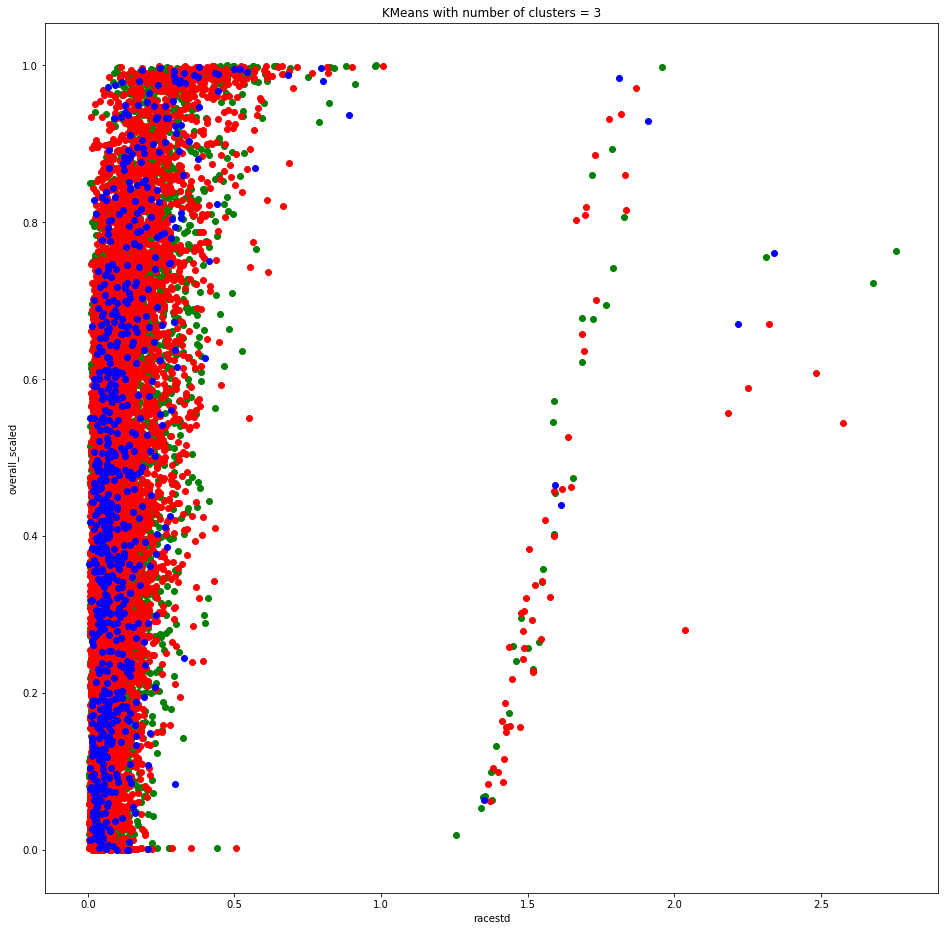

'next plot please'

'Label: columns of X_train going into affinity_propagation: : Column names are:'

Index(['age_scaled', 'sustainer', 'gender_int', 'racestd'], dtype='object')

2019-07-25 23:22:58: In: run_affinity_propagation 


starting AffinityPropagation 

2019-07-25 23:22:58: In: run_affinity_propagation 


Begin 

Estimated number of clusters: 7625
from run_affinity_propagation 0.11268298691068244


2019-07-25 23:35:29: In: run_affinity_propagation 


finished with AffinityPropagation 

'dataframe.isnull().sum()'

age_scaled        0
sustainer         0
gender_int        0
racestd           0
overall_scaled    0
cluster           0
dtype: int64

'dataframe.columns\n'

Index(['age_scaled', 'sustainer', 'gender_int', 'racestd', 'overall_scaled', 'cluster'], dtype='object')

'dataframe.head(10)\n'

,age_scaled,sustainer,gender_int,racestd,overall_scaled,cluster
6260,0.565,0.000,1.000,0.129,0.458,5421
10551,0.613,0.000,1.000,0.049,0.557,5601
2327,0.097,0.000,1.000,0.309,0.656,1242
13087,0.177,0.000,1.000,0.126,0.937,6884
8747,0.435,0.000,1.000,0.222,0.945,4624
4313,0.500,0.000,1.000,0.028,0.181,2285
5463,0.323,0.000,1.000,0.230,0.562,2921
10232,0.468,0.000,0.000,0.119,0.585,5433
7808,0.452,0.000,1.000,0.064,0.248,4138
6497,0.371,0.000,1.000,0.126,0.705,1431


'dataframe.sample(10)\n'

,age_scaled,sustainer,gender_int,racestd,overall_scaled,cluster
13848,0.290,0.000,0.000,0.033,0.537,7267
7118,0.645,0.000,1.000,0.239,0.492,187
6082,0.419,0.000,1.000,0.074,0.364,3233
14123,0.597,0.000,1.000,0.171,0.754,7409
7073,0.516,0.000,1.000,0.058,0.331,4977
9789,0.355,0.000,0.000,0.116,0.533,4734
7421,0.065,0.000,1.000,0.046,0.378,3949
3871,0.210,0.000,1.000,0.063,0.175,2055
770,0.129,0.000,1.000,0.039,0.015,3757
1299,0.242,1.000,1.000,0.011,0.076,5922


'dataframe.dtypes\n'

age_scaled        float64
sustainer         float64
gender_int        float64
racestd           float64
overall_scaled    float64
cluster             int64
dtype: object

'dataframe.describe()\n'

,age_scaled,sustainer,gender_int,racestd,overall_scaled,cluster
count,13107.000,13107.000,13107.000,13107.000,13107.000,13107.000
mean,0.364,0.057,0.645,0.123,0.439,3605.407
std,0.162,0.232,0.478,0.165,0.273,2171.660
min,0.000,0.000,0.000,0.003,0.000,0.000
25%,0.242,0.000,0.000,0.045,0.208,1698.500
50%,0.371,0.000,1.000,0.083,0.419,3732.000
75%,0.484,0.000,1.000,0.149,0.648,5296.500
max,0.919,1.000,1.000,2.756,1.000,7624.000


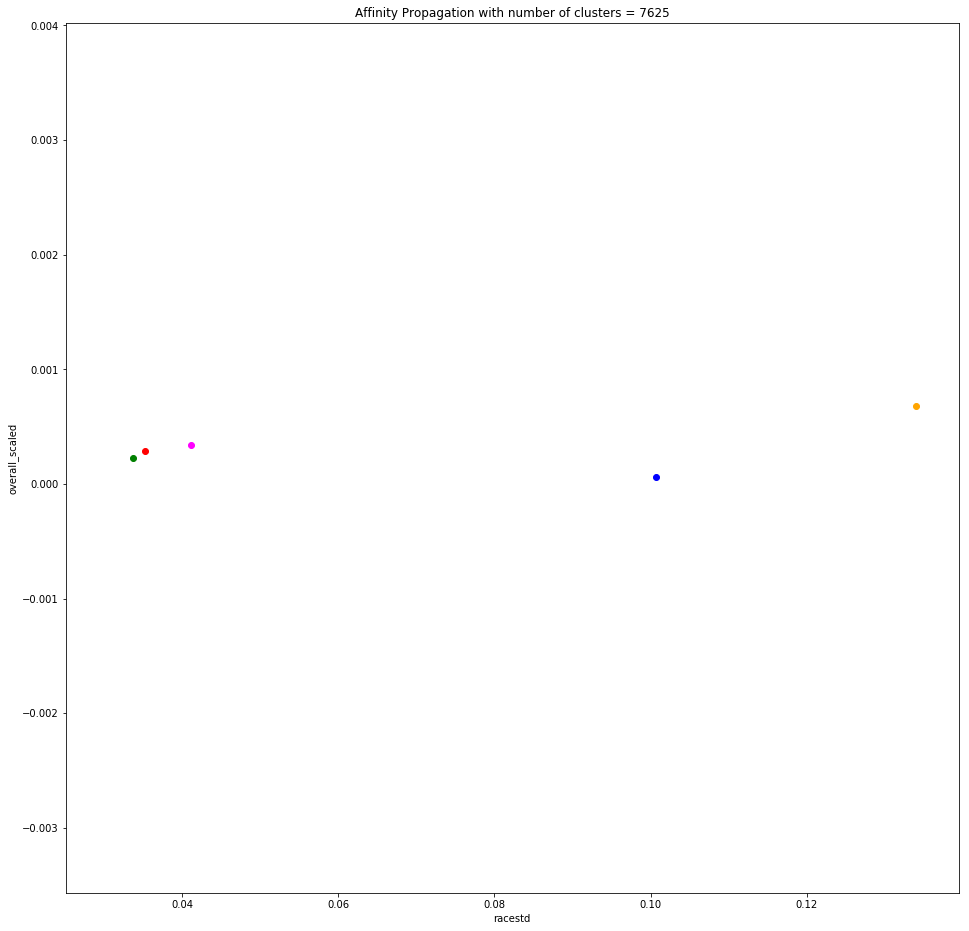

2019-07-25 23:35:30: In: run_mean_shift 


Begin 

from mean shift 0.7359724125900627
Number of estimated clusters: 11


2019-07-25 23:35:33: In: run_mean_shift 


End 

'dataframe.isnull().sum()'

age_scaled        0
sustainer         0
gender_int        0
racestd           0
overall_scaled    0
cluster           0
dtype: int64

'dataframe.columns\n'

Index(['age_scaled', 'sustainer', 'gender_int', 'racestd', 'overall_scaled', 'cluster'], dtype='object')

'dataframe.head(10)\n'

,age_scaled,sustainer,gender_int,racestd,overall_scaled,cluster
6260,0.565,0.000,1.000,0.129,0.458,0
10551,0.613,0.000,1.000,0.049,0.557,1
2327,0.097,0.000,1.000,0.309,0.656,1
13087,0.177,0.000,1.000,0.126,0.937,0
8747,0.435,0.000,1.000,0.222,0.945,1
4313,0.500,0.000,1.000,0.028,0.181,1
5463,0.323,0.000,1.000,0.230,0.562,1
10232,0.468,0.000,0.000,0.119,0.585,1
7808,0.452,0.000,1.000,0.064,0.248,0
6497,0.371,0.000,1.000,0.126,0.705,0


'dataframe.sample(10)\n'

,age_scaled,sustainer,gender_int,racestd,overall_scaled,cluster
12243,0.210,0.000,0.000,0.162,0.720,0
9601,0.629,0.000,1.000,0.052,0.388,2
1328,0.419,0.000,1.000,0.031,0.063,1
13866,0.468,0.000,0.000,0.082,0.654,4
8247,0.548,0.000,1.000,0.025,0.271,1
7378,0.516,0.000,1.000,0.044,0.309,1
7635,0.516,0.000,1.000,0.100,0.407,0
12871,0.097,0.000,0.000,0.056,0.570,0
99,0.161,0.000,1.000,0.070,0.002,0
4305,0.306,0.000,1.000,0.043,0.250,0


'dataframe.dtypes\n'

age_scaled        float64
sustainer         float64
gender_int        float64
racestd           float64
overall_scaled    float64
cluster             int64
dtype: object

'dataframe.describe()\n'

,age_scaled,sustainer,gender_int,racestd,overall_scaled,cluster
count,13107.000,13107.000,13107.000,13107.000,13107.000,13107.000
mean,0.364,0.057,0.645,0.123,0.439,0.547
std,0.162,0.232,0.478,0.165,0.273,0.782
min,0.000,0.000,0.000,0.003,0.000,0.000
25%,0.242,0.000,0.000,0.045,0.208,0.000
50%,0.371,0.000,1.000,0.083,0.419,0.000
75%,0.484,0.000,1.000,0.149,0.648,1.000
max,0.919,1.000,1.000,2.756,1.000,10.000


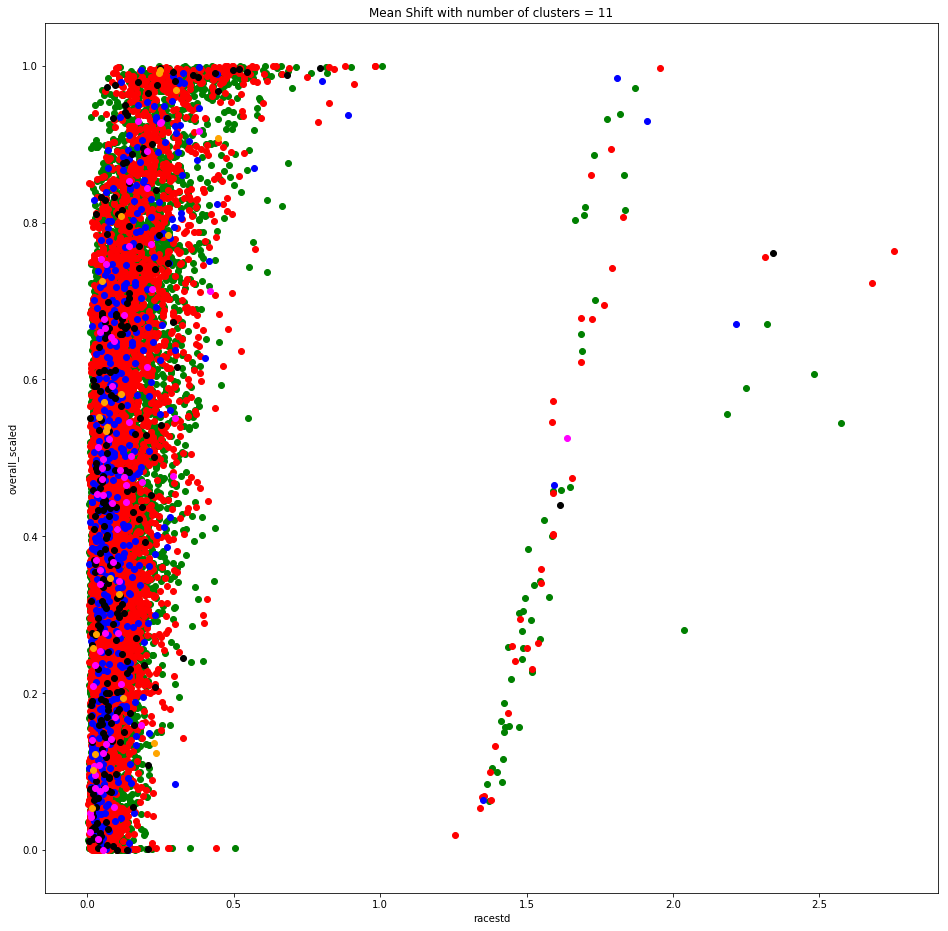

'Label: entering run_spectral_clustering, data has shape of:: Dataframe shape is:'

(14547, 4)

'Label: entering run_spectral_clustering, target has shape of:: Dataframe shape is:'

(14547,)

2019-07-25 23:35:34: In: run_spectral_clustering 


Begin 

2019-07-25 23:35:34: In: run_spectral_clustering Running spectral_clustering with 3 clusters. 

from spectral clustering 0.7531897945637207


2019-07-25 23:37:02: In: run_spectral_clustering 


End 

'dataframe.isnull().sum()'

age_scaled        0
sustainer         0
gender_int        0
racestd           0
overall_scaled    0
cluster           0
dtype: int64

'dataframe.columns\n'

Index(['age_scaled', 'sustainer', 'gender_int', 'racestd', 'overall_scaled', 'cluster'], dtype='object')

'dataframe.head(10)\n'

,age_scaled,sustainer,gender_int,racestd,overall_scaled,cluster
6260,0.565,0.000,1.000,0.129,0.458,0
10551,0.613,0.000,1.000,0.049,0.557,2
2327,0.097,0.000,1.000,0.309,0.656,2
13087,0.177,0.000,1.000,0.126,0.937,0
8747,0.435,0.000,1.000,0.222,0.945,2
4313,0.500,0.000,1.000,0.028,0.181,2
5463,0.323,0.000,1.000,0.230,0.562,2
10232,0.468,0.000,0.000,0.119,0.585,2
7808,0.452,0.000,1.000,0.064,0.248,0
6497,0.371,0.000,1.000,0.126,0.705,0


'dataframe.sample(10)\n'

,age_scaled,sustainer,gender_int,racestd,overall_scaled,cluster
4175,0.597,0.000,1.000,0.204,0.523,2
4671,0.290,0.000,1.000,0.087,0.208,0
14179,0.419,0.000,0.000,0.042,0.678,2
8402,0.484,0.000,0.000,0.392,0.918,0
14158,0.613,0.000,1.000,0.249,0.995,2
8751,0.500,1.000,1.000,0.017,0.208,0
1938,0.468,0.000,1.000,0.024,0.206,2
11113,0.468,0.000,0.000,0.200,0.662,0
11380,0.210,0.000,0.000,0.029,0.574,0
7436,0.323,0.000,0.000,0.096,0.378,2


'dataframe.dtypes\n'

age_scaled        float64
sustainer         float64
gender_int        float64
racestd           float64
overall_scaled    float64
cluster             int32
dtype: object

'dataframe.describe()\n'

,age_scaled,sustainer,gender_int,racestd,overall_scaled,cluster
count,13107.000,13107.000,13107.000,13107.000,13107.000,13107.000
mean,0.364,0.057,0.645,0.123,0.439,0.820
std,0.162,0.232,0.478,0.165,0.273,0.956
min,0.000,0.000,0.000,0.003,0.000,0.000
25%,0.242,0.000,0.000,0.045,0.208,0.000
50%,0.371,0.000,1.000,0.083,0.419,0.000
75%,0.484,0.000,1.000,0.149,0.648,2.000
max,0.919,1.000,1.000,2.756,1.000,2.000


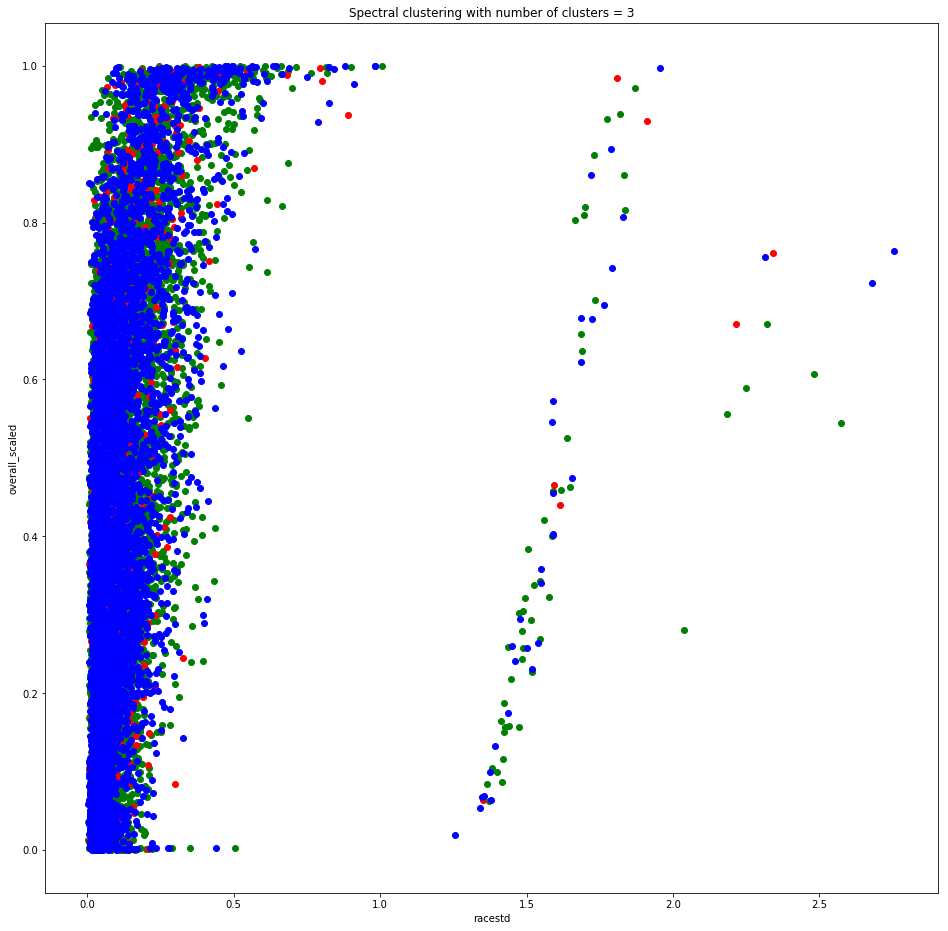

2019-07-25 23:37:02: In: run_it End


 

2019-07-25 23:37:02: In: main Ending main() 

In [448]:
main(0)